In [2]:
"""

Dotplot to reveal the relationship.

"""

'\n\nDotplot to reveal the relationship.\n\n'

In [3]:
import os, sys, glob
import numpy as np
import pandas as pd
import pyranges as pr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [4]:
# z-score matrix

zmat = pd.read_csv('ctcf_rad21_zmat.txt', sep='\t')
zmat.head()

,CTCF_35846_r1,CTCF_36632_r1,CTCF_45230_r1,CTCF_46184_r1,CTCF_50988_r1,RAD21_45689_r1,RAD21_46164_r1,RAD21_91096_r1,RAD21_94415_r1,CTCF_35846_r2,CTCF_36632_r2,CTCF_45230_r2,CTCF_46184_r2,CTCF_50988_r2,RAD21_45689_r2,RAD21_46164_r2,RAD21_91096_r2,RAD21_94415_r2
0,-1.318572,-0.157354,-0.339638,-0.614140,-0.827945,0.130854,-0.933315,0.898413,-0.001785,-1.491006,0.742233,0.434203,-0.125670,-0.444897,1.257339,-0.672018,2.492324,0.970974
1,-1.573287,0.056552,-0.180618,-0.574109,-0.892400,0.500983,-0.899813,1.496707,0.184310,-1.408912,0.571536,0.255217,-0.272493,-0.559289,1.070003,-0.771598,2.217087,0.780124
2,-1.455468,0.150923,-0.168586,-0.730053,-1.001251,0.579184,-1.103368,1.688356,0.388852,-0.980324,0.605919,0.260577,-0.435935,-0.583242,0.935045,-1.027605,2.048915,0.828063
3,-1.323979,0.103611,-0.176518,-0.885393,-0.967052,0.498324,-1.200650,1.512596,0.291995,-0.865260,0.736269,0.382021,-0.524749,-0.624298,0.966360,-0.997551,2.114469,0.959804
4,-1.446131,0.083871,-0.150503,-0.980339,-1.029557,0.409386,-1.089981,1.583741,0.399450,-0.842970,0.651597,0.363544,-0.530841,-0.520532,1.000578,-0.901557,2.091617,0.908629


In [5]:
zmat.shape

(20, 18)

In [24]:
# mean of zscore for each column
# exclude first two rows

zscore_mean = zmat.drop([0,1]).mean(axis=0)
print(zscore_mean)
len(zscore_mean)

CTCF_35846_r1    -1.866253
CTCF_36632_r1    -0.271989
CTCF_45230_r1    -0.451209
CTCF_46184_r1    -0.972928
CTCF_50988_r1    -1.170399
RAD21_45689_r1    0.240721
RAD21_46164_r1   -0.839678
RAD21_91096_r1    1.207393
RAD21_94415_r1   -0.043953
CTCF_35846_r2    -0.799181
CTCF_36632_r2     0.676505
CTCF_45230_r2     0.480833
CTCF_46184_r2    -0.031745
CTCF_50988_r2    -0.213010
RAD21_45689_r2    1.159113
RAD21_46164_r2    0.037142
RAD21_91096_r2    2.147408
RAD21_94415_r2    0.711231
dtype: float64


18

In [6]:
# normed and subed loop number matrix

subed_r1 = pd.read_csv('ctcf_rad21_subed_r1.txt', sep='\t')
subed_r2 = pd.read_csv('ctcf_rad21_subed_r2.txt', sep='\t')

In [8]:
# merge subed matrix to one

subed = pd.concat([subed_r1, subed_r2], axis=1)
subed

,CTCF_35846_r1,CTCF_36632_r1,CTCF_45230_r1,CTCF_46184_r1,CTCF_50988_r1,RAD21_45689_r1,RAD21_46164_r1,RAD21_91096_r1,RAD21_94415_r1,CTCF_35846_r2,CTCF_36632_r2,CTCF_45230_r2,CTCF_46184_r2,CTCF_50988_r2,RAD21_45689_r2,RAD21_46164_r2,RAD21_91096_r2,RAD21_94415_r2
0,-1.817879,1.187059,0.715354,0.005014,-0.548260,1.932869,-0.820931,3.919115,1.589633,-2.264092,3.514960,2.717859,1.269050,0.442971,4.847925,-0.144761,8.043750,4.106884
1,-0.476468,0.441105,0.307582,0.086053,-0.093140,0.691312,-0.097313,1.251888,0.513031,-0.383928,0.731033,0.552950,0.255858,0.094396,1.011661,-0.025130,1.657451,0.848464
2,-0.136665,0.125201,0.073117,-0.018411,-0.062620,0.195015,-0.079267,0.375826,0.163987,-0.059209,0.199373,0.143077,0.029535,0.005522,0.253025,-0.066916,0.434603,0.235586
3,-0.045999,0.080637,0.055788,-0.007094,-0.014337,0.115650,-0.035059,0.205622,0.097348,-0.005308,0.136758,0.105334,0.024897,0.016067,0.157168,-0.017043,0.259012,0.156586
4,-0.021588,0.070164,0.056109,0.006345,0.003393,0.089685,-0.000230,0.160109,0.089089,0.014583,0.104210,0.086936,0.033300,0.033919,0.125138,0.011069,0.190566,0.119624
5,-0.014374,0.060106,0.049277,0.013537,0.009912,0.078734,0.009486,0.124261,0.070317,0.027710,0.100241,0.085114,0.046546,0.044703,0.116600,0.036271,0.163029,0.102895
6,-0.000191,0.053713,0.045839,0.018263,0.016268,0.069939,0.020400,0.106606,0.060462,0.032781,0.089238,0.079540,0.050392,0.045897,0.103070,0.048171,0.140540,0.090289
7,0.004446,0.052130,0.045713,0.027056,0.025276,0.071068,0.030515,0.098450,0.063805,0.038668,0.082948,0.074511,0.050568,0.049315,0.092076,0.051729,0.124266,0.080953
8,0.005613,0.045209,0.041246,0.023929,0.018590,0.057398,0.027866,0.079943,0.049064,0.033408,0.068492,0.063168,0.042092,0.044392,0.083607,0.051405,0.107059,0.072341
9,0.006104,0.042688,0.038663,0.023113,0.022752,0.054707,0.030562,0.075819,0.049091,0.034133,0.070328,0.065707,0.051098,0.049546,0.081112,0.057218,0.102522,0.069005


In [9]:
# mean of loop number for each column
# exclude first two rows

loop_mean = subed.drop([0,1]).mean(axis=0)
print(loop_mean)
len(loop_mean)

CTCF_35846_r1    -0.006448
CTCF_36632_r1     0.044949
CTCF_45230_r1     0.037105
CTCF_46184_r1     0.016660
CTCF_50988_r1     0.011255
RAD21_45689_r1    0.059765
RAD21_46164_r1    0.013806
RAD21_91096_r1    0.093408
RAD21_94415_r1    0.052616
CTCF_35846_r2     0.019423
CTCF_36632_r2     0.069818
CTCF_45230_r2     0.060733
CTCF_46184_r2     0.037592
CTCF_50988_r2     0.033774
RAD21_45689_r2    0.082321
RAD21_46164_r2    0.030594
RAD21_91096_r2    0.116920
RAD21_94415_r2    0.073929
dtype: float64


18

In [11]:
# peak number

## load bed files
bedpath = '../data/bed/ctcf.rad21/'
bedfile = glob.glob(os.path.join(bedpath,'*.bed'))
peaknum = []
for b in bedfile:
    bed = pr.read_bed(b)
    peaknum.append(len(bed))

In [12]:
print(peaknum)
len(peaknum)

[70084, 82900, 87184, 101440, 97256, 92669, 151864, 86582, 51993]


9

In [13]:
#peaknum = np.repeat(peaknum, 2)
peaknum = peaknum + peaknum
peaknum

[70084,
 82900,
 87184,
 101440,
 97256,
 92669,
 151864,
 86582,
 51993,
 70084,
 82900,
 87184,
 101440,
 97256,
 92669,
 151864,
 86582,
 51993]

In [14]:
len(peaknum)
#type(peaknum)

18

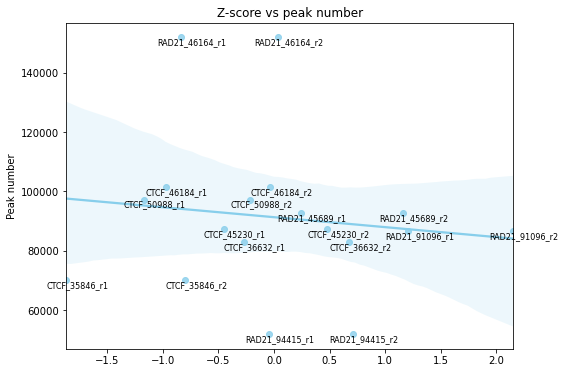

In [74]:
## plot
plt.figure(figsize=(8,6))

plt.title("Z-score vs peak number") #title
plt.xlabel("Z-sore") #x label
plt.ylabel("Peak number") #y label

sns.regplot(x=zscore_mean, y=peaknum, fit_reg=True, marker="o", color="skyblue")
for i in range(0, len(zscore_mean)):
     plt.text(x=zscore_mean[i]+0.1, y=peaknum[i]-2500,
          s=zscore_mean.index[i], horizontalalignment='center',
          fontsize=8, color='black')

plt.savefig('ctcf_rad21_zvsp.pdf')
plt.show()

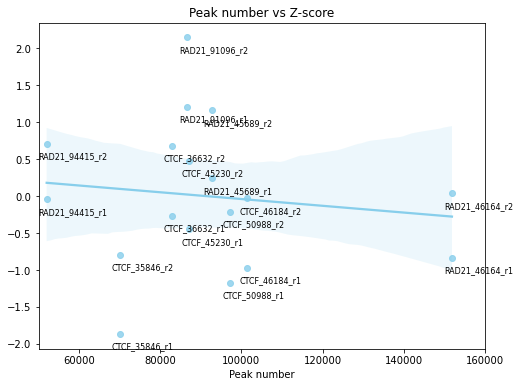

In [135]:
## plot
plt.figure(figsize=(8,6))

plt.title("Peak number vs Z-score") #title
plt.ylabel("Z-sore") #x label
plt.xlabel("Peak number") #y label

plt.xlim((50000, 160000))
#plt.ylim((-2, 2))

sns.regplot(x=peaknum, y=zscore_mean, fit_reg=True, marker="o", color="skyblue")
for i in range(0, len(zscore_mean)):
     plt.text(x=peaknum[i]-2000, y=zscore_mean[i]-0.2,
          s=zscore_mean.index[i], fontsize=8, color='black')

plt.savefig('ctcf_rad21_pknum_zs.pdf')
#plt.margins(0.1)
plt.show()

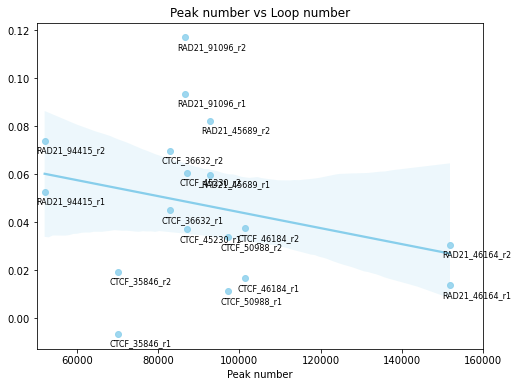

In [22]:
## plot
plt.figure(figsize=(8,6))

plt.title("Peak number vs Loop number") #title
plt.ylabel("Loop number") #x label
plt.xlabel("Peak number") #y label

plt.xlim((50000, 160000))
#plt.ylim((-2, 2))

sns.regplot(x=peaknum, y=loop_mean, fit_reg=True, marker="o", color="skyblue")
for i in range(0, len(loop_mean)):
     plt.text(x=peaknum[i]-2000, y=loop_mean[i]-0.005,
          s=loop_mean.index[i], fontsize=8, color='black')

plt.savefig('ctcf_rad21_pknum_lpnum.pdf')
#plt.margins(0.1)
plt.show()

In [29]:
## test the correlation
# zscore vs peak number

print(scipy.stats.pearsonr(peaknum, zscore_mean))
print(scipy.stats.spearmanr(peaknum, zscore_mean))
print(scipy.stats.kendalltau(peaknum, zscore_mean))

(-0.1239421893583109, 0.6241424554907886)
SpearmanrResult(correlation=-0.18247995399092784, pvalue=0.4686138430937522)
KendalltauResult(correlation=-0.1347420139090739, pvalue=0.4457659079148423)


In [26]:
# peak number vs zsocre 

print(scipy.stats.pearsonr(loop_mean, zscore_mean))
print(scipy.stats.spearmanr(loop_mean, zscore_mean))
print(scipy.stats.kendalltau(loop_mean, zscore_mean))

(0.978787736642555, 1.9286275081511765e-12)
SpearmanrResult(correlation=0.9525283797729618, pvalue=1.1169590316176146e-09)
KendalltauResult(correlation=0.8692810457516341, pvalue=2.158258582693712e-09)
